In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")  # Update the file path if needed

# Encode categorical variables
label_encoders = {}
categorical_columns = [ "Gender" ,"family_history_with_overweight", "FAVC", "CAEC", "SMOKE",
                        "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numerical columns
numerical_columns = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Define features & target
X = df.drop(columns=["NObeyesdad"])  # Features
y = df["NObeyesdad"]  # Target variable

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9527186761229315
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      0.98      0.90        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.88      0.91        58
           6       0.96      0.93      0.95        58

    accuracy                           0.95       423
   macro avg       0.96      0.95      0.95       423
weighted avg       0.96      0.95      0.95       423



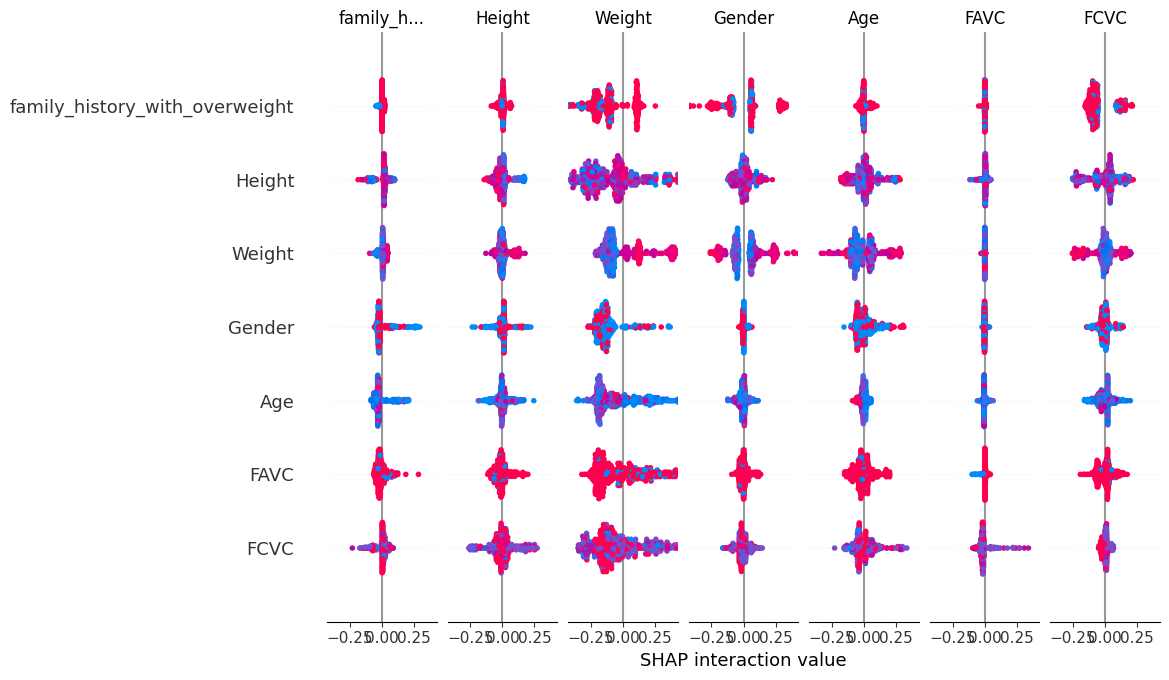

In [5]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


<ipython-input-6-edaff02a17d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NObeyesdad", data=df, palette="coolwarm", order=df["NObeyesdad"].value_counts().index)


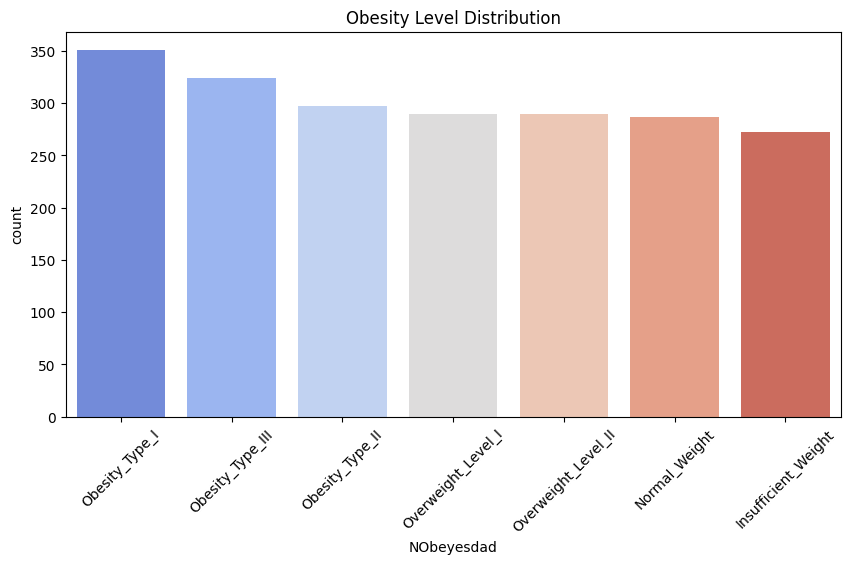

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")

# Countplot for Obesity Levels
plt.figure(figsize=(10,5))
sns.countplot(x="NObeyesdad", data=df, palette="coolwarm", order=df["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Obesity Level Distribution")
plt.show()


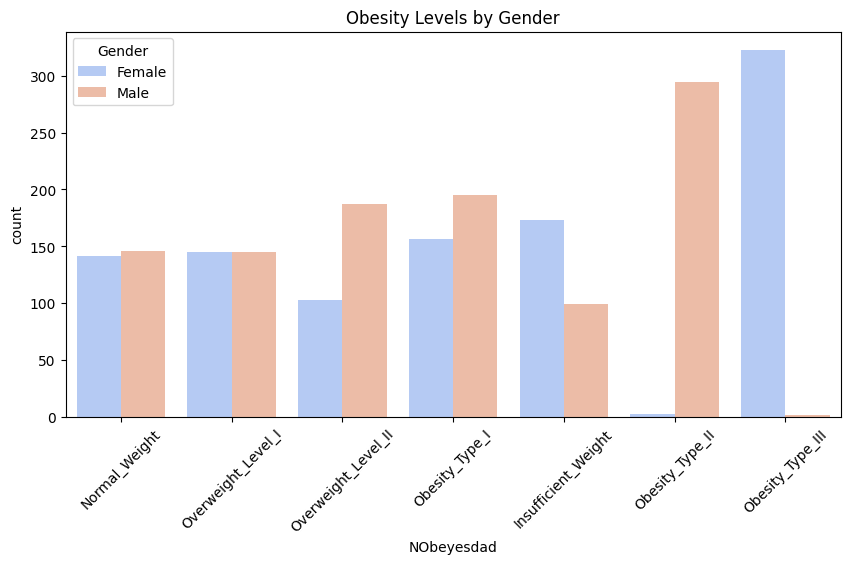

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="NObeyesdad", hue="Gender", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Obesity Levels by Gender")
plt.show()


<ipython-input-9-76a660b120f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="NObeyesdad", y="FCVC", data=df, palette="coolwarm")


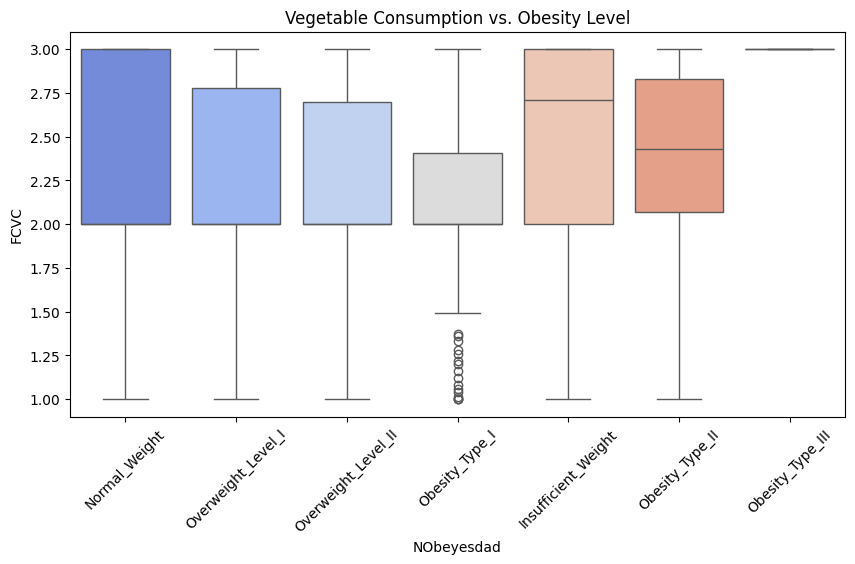

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x="NObeyesdad", y="FCVC", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Vegetable Consumption vs. Obesity Level")
plt.show()


In [10]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Weight", color="NObeyesdad", title="Weight vs. Age Colored by Obesity Level")
fig.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode categorical variables
df_encoded = df.copy()
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
df_encoded[categorical_cols] = df_encoded[categorical_cols].apply(LabelEncoder().fit_transform)

# Define features and target
X = df_encoded.drop(columns=["NObeyesdad"])
y = df_encoded["NObeyesdad"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.89      0.95      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



<ipython-input-13-2045db28bf5d>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




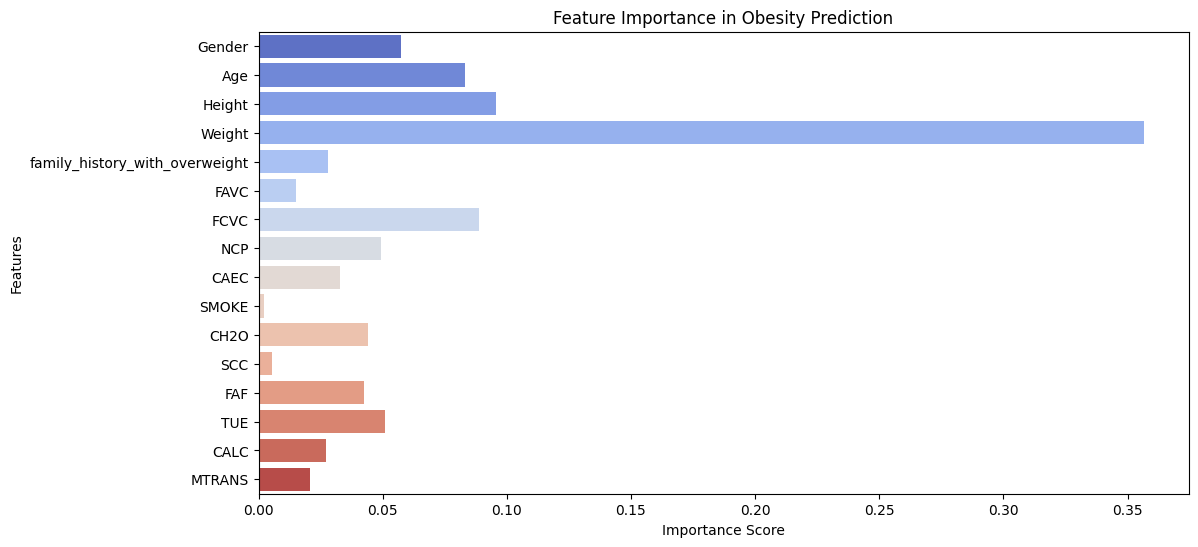

In [13]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features, palette="coolwarm")
plt.title("Feature Importance in Obesity Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


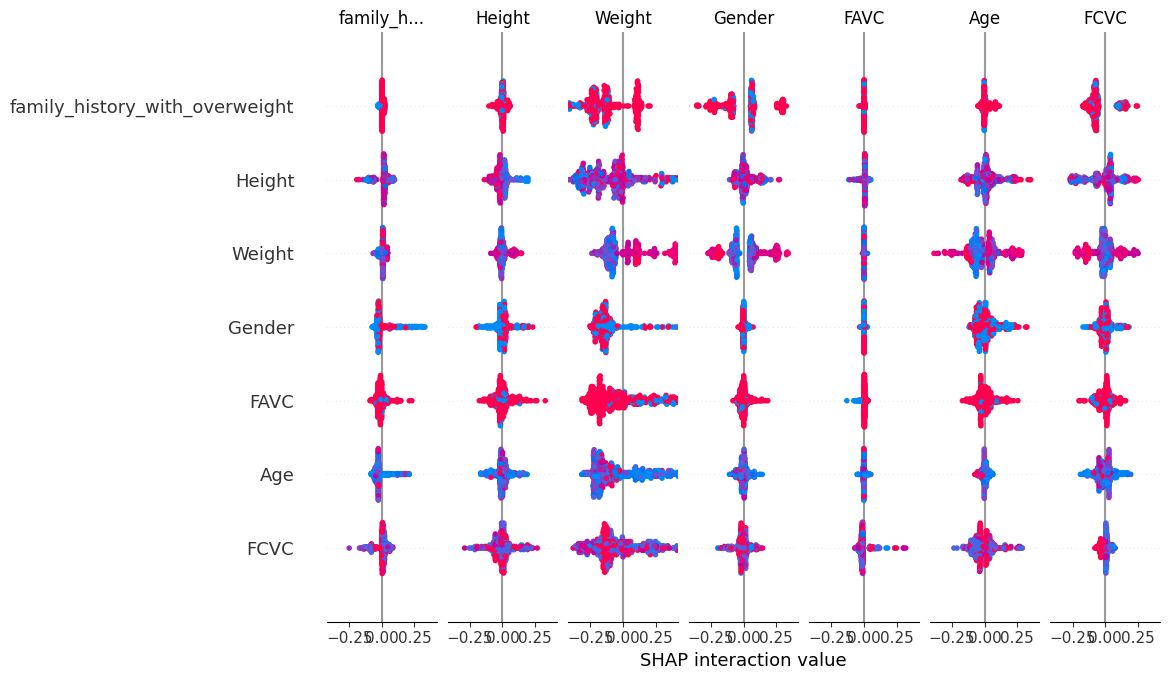

In [14]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 7 and the array at index 1 has size 42